In [1]:
import os
import random
from collections import defaultdict, Counter
from statistics import mode

import numpy as np
import pandas as pd
import nibabel
from matplotlib import colors
import matplotlib.style
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# import seaborn as sns
import matplotlib
%matplotlib inline
import numpy as np
import nilearn
from nilearn import datasets, plotting, image, surface
import nibabel as nib
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from neurolang import frontend as fe
from neurolang import regions

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/amachlou/git/neurolang/neurolang/expression_pattern_matching.py:54: UserWarning: Warning in class FirstOrderLogicSolver overwrites {'universal_predicate', 'existential_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [2]:
destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])
destrieux_dataset['labels']

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
           (  2, b'L G_and_S_occipital_inf'),
           (  3, b'L G_and_S_paracentral'),
           (  4, b'L G_and_S_subcentral'),
           (  5, b'L G_and_S_transv_frontopol'),
           (  6, b'L G_and_S_cingul-Ant'),
           (  7, b'L G_and_S_cingul-Mid-Ant'),
           (  8, b'L G_and_S_cingul-Mid-Post'),
           (  9, b'L G_cingul-Post-dorsal'),
           ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
           ( 12, b'L G_front_inf-Opercular'),
           ( 13, b'L G_front_inf-Orbital'),
           ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
           ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
           ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
           ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
           ( 22, b'L G_oc-temp_med-Lingual'),
           ( 23, b'L G_oc-temp_med-Parahip'), ( 24, b'L G_orbital'),
  

In [3]:
# destr_points = nilearn.surface.vol_to_surf(destrieux_map, '108525.L.pial.32k_fs_LR.surf.gii')

In [4]:
# destr_regions={}

# for label_number, name in destrieux_dataset['labels']:
#     name = name.decode()
#     if not name.startswith('L') or ('S_' not in name and 'G_' not in name and 'Lat_Fis' not in name):
#         continue
#     name = 'L_' + name[2:].replace('-', '_')
    
#     for x in range(1, len(destrieux_dataset['labels'])):    
#         voxels_ijk  = np.transpose((destrieux_map.get_data()==x).nonzero())
#         destr_regions[name]= nib.affines.apply_affine(destrieux_map.affine, voxels_ijk)

In [5]:
surface = nib.load('108525.L.pial.32k_fs_LR.surf.gii')
vertices = surface.darrays[0].data
manual_sulci_gii = nib.load('108525_L_manual_segmentation.func.gii')
manual_sulci = dict()
for darray in manual_sulci_gii.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices[darray.data.nonzero()]
    manual_sulci[name] = points
    print(f"{name}: number of points {points.shape[0]}")

Hippocampal_sulcus: number of points 191
Superior_parietal_sulcus: number of points 48
Intraparietal_sulcus: number of points 246
Frontomarginal_sulcus: number of points 56
Middle_frontal_sulcus: number of points 187
Inferior_frontal_sulcus: number of points 228
Superior_frontal_sulcus: number of points 298
Intermediate_primus_of_Jensen: number of points 115
Retrocalcarine_sulcus: number of points 37
Lunate_sulcus: number of points 31
Lateral_occipital_sulcus: number of points 101
Superior_occipital_sulcus: number of points 131
Inferior_occipital_sulcus: number of points 131
Anterior_occipital_sulcus: number of points 205
Intralingual_sulcus: number of points 62
Collateral_sulcus: number of points 231
Occipitotemporal_sulcus: number of points 252
Orbital_H_shaped_sulcus: number of points 153
Olfactory_sulcus: number of points 120
Temporopolar_sulcus: number of points 49
Inferior_temporal_sulcus: number of points 124
Angular_sulcus: number of points 256
Superior_temporal_sulcus: number 

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525_L_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [6]:
nl = fe.RegionFrontend()

for name, points in manual_sulci.items():
    ijk_points = nib.affines.apply_affine(np.linalg.inv(destrieux_map.affine), points).astype(int)
    region = fe.ExplicitVBR(
        ijk_points,
        destrieux_map.affine,
        img_dim=destrieux_map.shape
    )
    nl.add_region(region, result_symbol_name=f'manual_{name}')
    
# for label_number, name in destrieux_dataset['labels']:
#     name = name.decode()
#     if not name.startswith('L') or ('S_' not in name and 'G_' not in name and 'Lat_Fis' not in name):
#         continue

#     # Create a region object
#     region = nl.create_region(destrieux_map, label=label_number)

#     # Fine tune the symbol name
#     name = 'L_' + name[2:].replace('-', '_')
#     nl.add_region(region, result_symbol_name=name)

In [7]:
from neurolang import regions

In [8]:
# oxplane = regions.PlanarVolume((7, 0, 0), (1, 0, 0))
# ox_plane_vbr_mr = oxplane.to_explicit_vbr(destrieux_map.affine, destrieux_map.shape)
# nl.add_region(ox_plane_vbr_mr, result_symbol_name='medial_R_plane')
# plotting.plot_roi(ox_plane_vbr_mr.spatial_image())

In [9]:
# oxplane = regions.PlanarVolume((0, 0, -6), (0, 0, 1))
# ox_plane_vbr_v = oxplane.to_explicit_vbr(destrieux_map.affine, destrieux_map.shape)
# nl.add_region(ox_plane_vbr_v, result_symbol_name='ventral_plane')
# plotting.plot_roi(ox_plane_vbr_v.spatial_image())

In [10]:
def make_planes(limiting_sulcus, axis):
    if axis==0:
        x = max((nl.symbols[f'manual_{limiting_sulcus}'].value.to_xyz().T[axis]), key=abs)
        oxplane = regions.PlanarVolume((x, 0, 0), (1, 0, 0))
        ox_plane_vbr = oxplane.to_explicit_vbr(destrieux_map.affine, destrieux_map.shape)
        nl.add_region(ox_plane_vbr, result_symbol_name='medial_L_plane')
        plotting.plot_roi(ox_plane_vbr.spatial_image())
    elif axis==2:
        x = np.max((nl.symbols[f'manual_{limiting_sulcus}'].value.to_xyz().T[axis]))
        oxplane = regions.PlanarVolume((0, 0, x), (0, 0, 1))
        ox_plane_vbr = oxplane.to_explicit_vbr(destrieux_map.affine, destrieux_map.shape)
        nl.add_region(ox_plane_vbr, result_symbol_name='ventral_L_plane')
        plotting.plot_roi(ox_plane_vbr.spatial_image())

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


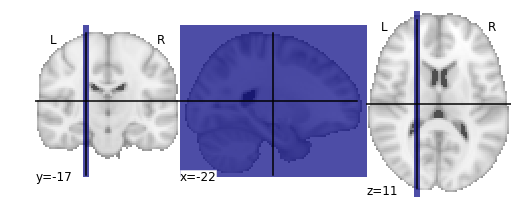

In [44]:
medial_L_plane = make_planes('Calcarine_sulcus', axis=0)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


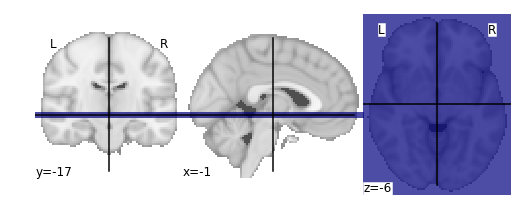

In [45]:
ventral_L_plane = make_planes('Collateral_sulcus', axis=2)

In [46]:
# oxplane = regions.PlanarVolume((-8, 0, 0), (1, 0, 0))
# ox_plane_vbr_ml = oxplane.to_explicit_vbr(destrieux_map.affine, destrieux_map.shape)
# nl.add_region(ox_plane_vbr_ml, result_symbol_name='medial_L_plane')
# plotting.plot_roi(ox_plane_vbr_ml.spatial_image())

In [47]:
# ml = nl.symbols.medial_L_plane.value.to_xyz()

In [48]:
x_labels = ['medial', 'overlaps', 'during_x', 'meets', 'starts', 'finishes', 'equals', 'lateral']
y_labels =  ['anterior', 'overlaps', 'during_y', 'meets', 'starts', 'finishes', 'equals', 'posterior']
z_labels = ['superior', 'overlaps', 'during_z', 'meets', 'starts', 'finishes', 'equals', 'inferior']

In [49]:
def tolerance_y_3(ys_origin_sulcus, ys_target_sulcus, length):
    # we consider I the origin
    before=set()
    overlaps=set()
    during=set()
    meets=set()
    starts=set()
    finishes=set()
    equals=set()
    after=set()
    Anterior_of=set()
    Posterior_of=set()
    During=set()
    J_minus = min(ys_target_sulcus)
    J_plus = max(ys_target_sulcus) + length
    
    I_boxes = set(ys_origin_sulcus)
    for x in I_boxes:
        I_minus = x
        I_plus = I_minus + length
        
        if I_minus < I_plus < J_minus < J_plus:
            before.add(x)
        if I_minus < J_minus < I_plus < J_plus:
            overlaps.add(x)
        if J_minus < I_minus < I_plus < J_plus:
            during.add(x)
        if I_minus < I_plus == J_minus < J_plus:
            meets.add(x)
        if I_minus == J_minus < I_plus < J_plus:
            starts.add(x)
        if J_minus < I_minus < I_plus == J_plus:
            finishes.add(x)
        if I_minus == J_minus < I_plus == J_plus:
            equals.add(x)
        if J_minus < J_plus < I_minus < I_plus:
            after.add(x)
    before_pc =  len(before) / len(I_boxes) * 100
    overlaps_pc =  len(overlaps) / len(I_boxes) * 100
    during_pc = len(during) / len(I_boxes) * 100
    meets_pc = len(meets) / len(I_boxes) * 100
    starts_pc = len(starts) / len(I_boxes) * 100
    finishes_pc = len(finishes) / len(I_boxes) * 100
    equals_pc = len(equals) / len(I_boxes) * 100
    after_pc = len(after) / len(I_boxes) * 100     

#     x = np.arange(8)
#     plt.bar(x, height= [before_pc, overlaps_pc, during_pc, meets_pc, starts_pc, finishes_pc, equals_pc, after_pc])
# #     plt.xticks(x+.5, [labels[0], labels[1], labels[2], labels[3], labels[4], labels[5], labels[6], labels[7]])
#     plt.xticks(x+.5, ['before','overlaps','during','meets','starts','finishes','equals','after'])
#     plt.axhline(y=80, color='r', linestyle='--')
#     plt.show()
    values = [before_pc, overlaps_pc, during_pc, meets_pc, starts_pc, finishes_pc, equals_pc, after_pc]
    
    return values

In [50]:
import heapq

In [51]:
def making_dominant_set_for_planes(plane, labels, subject_manual_sulci, axis):
    
    x = nl.new_region_symbol('x')
    q = nl.query(
        x, 
        (
            nl.symbols.right_of(x, nl.symbols[plane]) |
            nl.symbols.left_of(x, nl.symbols[plane]) |
            nl.symbols.superior_of(x, nl.symbols[plane]) |
            nl.symbols.inferior_of(x, nl.symbols[plane])
        )
    )
    
    res = q.do()
    
    superior=set()
    inferior=set()
    during_z=set()
    medial=set()
    lateral=set()
    during_x=set()
    
    for r in res:
        if r.symbol_name.startswith('manual_'):
            sulcus_relativity = tolerance_y_3((nl.symbols[plane].value.to_xyz()).T[axis], subject_manual_sulci[r.symbol_name[7:]].T[axis], length=.1)
            relations = []
            relations_second_largest = []
            R = np.argsort(-np.array(sulcus_relativity))
            relations_second_largest.append(labels[R[1]])
            relations.append(labels[np.argmax(np.array(sulcus_relativity))])
#             print(relations)
#             print('largest', heapq.nlargest(2, relations))
#             length=len(relations)
#             relations.sort()
#             if mode(relations)=='anterior':
#                 anterior.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='posterior':
#                 posterior.add(nl.symbols[r.symbol_name])
#             elif mode(relations)=='during_y':
#                 during_y.add(nl.symbols[r.symbol_name])
            if mode(relations)=='superior':
                superior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='inferior':
                inferior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_z':
                if mode(relations_second_largest)=='superior':
                    superior.add(nl.symbols[r.symbol_name])
                elif mode(relations_second_largest)=='inferior':
                    inferior.add(nl.symbols[r.symbol_name])
#                 during_z.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='medial':
                medial.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='lateral':
                lateral.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_x':
                if mode(relations_second_largest)=='medial':
                    medial.add(nl.symbols[r.symbol_name])
                elif mode(relations_second_largest)=='lateral':
                    lateral.add(nl.symbols[r.symbol_name])
#                 print(heapq.nlargest(3, relations))
#                 for m in relations:
#                     if m=='during_x':
#                         relations.remove(m)
#                 if mode(relations)=='medial':
#                     medial.add(nl.symbols[r.symbol_name])
#                 elif mode(relations)=='lateral':
#                     lateral.add(nl.symbols[r.symbol_name])
#                 during_x.add(nl.symbols[r.symbol_name])
            else:
                continue            
            
#         if axis==1:
#             anterior_dominant = nl.add_region_set(anterior, name=f'{primary_sulcus}_anterior_dominant')
#             posterior_dominant = nl.add_region_set(posterior, name=f'{primary_sulcus}_posterior_dominant')
#             during_y_dominant = nl.add_region_set(during_y, name=f'{primary_sulcus}_during_y_dominant')
        if axis==2:
            superior_dominant = nl.add_region_set(superior, name='superior_sulci')
            inferior_dominant = nl.add_region_set(inferior, name='ventral_sulci')
#             during_z_dominant = nl.add_region_set(during_z, name=f'{plane}_during_z_dominant')
        elif axis==0:
            medial_dominant = nl.add_region_set(medial, name='medial_sulci')
            lateral_dominant = nl.add_region_set(lateral, name='lateral_sulci')
#             during_x_dominant = nl.add_region_set(during_x, name=f'{plane}_during_x_dominant')

In [52]:
medial_test = making_dominant_set_for_planes('medial_L_plane', x_labels, manual_sulci, axis=0)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [53]:
ventral_test = making_dominant_set_for_planes('ventral_L_plane', z_labels, manual_sulci, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


In [54]:
nl.symbols.superior_sulci

superior_sulci: typing.AbstractSet[neurolang.regions.Region] = ['manual_Callosal_sulcus', 'manual_Anterior_horizontal_ramus_lateral_fissure', 'manual_Hippocampal_sulcus', 'manual_Anterior_vertical_ramus_lateral_fissure', 'manual_Anterior_occipital_sulcus', 'manual_Postcentral_sulcus', 'manual_Lateral_fissure', 'manual_Intraparietal_sulcus', 'manual_Superior_frontal_sulcus', 'manual_Calcarine_sulcus', 'manual_Inferior_occipital_sulcus', 'manual_Cingulate_sulcus', 'manual_Inferior_frontal_sulcus', 'manual_Central_sulcus', 'manual_Callosomarginal_sulcus', 'manual_Paracentral_sulcus', 'manual_Superior_temporal_sulcus', 'manual_Superior_occipital_sulcus', 'manual_Cuneal_sulcus', 'manual_Retrocalcarine_sulcus', 'manual_Superior_rostral_sulcus', 'manual_Superior_parietal_sulcus', 'manual_Subparietal_sulcus', 'manual_Middle_frontal_sulcus', 'manual_Paracingulate_sulcus', 'manual_Intralingual_sulcus', 'manual_Inferior_rostral_sulcus', 'manual_Angular_sulcus', 'manual_Intermediate_primus_of_Jens

In [55]:
nl.symbols.ventral_sulci

ventral_sulci: typing.AbstractSet[neurolang.regions.Region] = ['manual_Collateral_sulcus', 'manual_Lunate_sulcus', 'manual_Olfactory_sulcus', 'manual_Frontomarginal_sulcus', 'manual_Temporopolar_sulcus', 'manual_Inferior_temporal_sulcus', 'manual_Occipitotemporal_sulcus', 'manual_Orbital_H_shaped_sulcus']

In [56]:
nl.symbols.medial_sulci

medial_sulci: typing.AbstractSet[neurolang.regions.Region] = ['manual_Callosal_sulcus', 'manual_Hippocampal_sulcus', 'manual_Postcentral_sulcus', 'manual_Olfactory_sulcus', 'manual_Superior_frontal_sulcus', 'manual_Calcarine_sulcus', 'manual_Cingulate_sulcus', 'manual_Central_sulcus', 'manual_Collateral_sulcus', 'manual_Callosomarginal_sulcus', 'manual_Frontomarginal_sulcus', 'manual_Paracentral_sulcus', 'manual_Superior_occipital_sulcus', 'manual_Cuneal_sulcus', 'manual_Retrocalcarine_sulcus', 'manual_Superior_rostral_sulcus', 'manual_Superior_parietal_sulcus', 'manual_Lunate_sulcus', 'manual_Subparietal_sulcus', 'manual_Paracingulate_sulcus', 'manual_Intralingual_sulcus', 'manual_Inferior_rostral_sulcus', 'manual_Intralimbic_sulcus', 'manual_Precentral_sulcus', 'manual_Orbital_H_shaped_sulcus', 'manual_Parieto_occipital_sulcus']

In [57]:
nl.symbols.medial_L_plane_lateral_dominant

medial_L_plane_lateral_dominant: typing.AbstractSet[neurolang.regions.Region] = ['manual_Anterior_horizontal_ramus_lateral_fissure', 'manual_Hippocampal_sulcus', 'manual_Anterior_vertical_ramus_lateral_fissure', 'manual_Anterior_occipital_sulcus', 'manual_Postcentral_sulcus', 'manual_Lateral_fissure', 'manual_Intraparietal_sulcus', 'manual_Temporopolar_sulcus', 'manual_Superior_frontal_sulcus', 'manual_Occipitotemporal_sulcus', 'manual_Inferior_occipital_sulcus', 'manual_Inferior_frontal_sulcus', 'manual_Collateral_sulcus', 'manual_Callosomarginal_sulcus', 'manual_Frontomarginal_sulcus', 'manual_Inferior_temporal_sulcus', 'manual_Superior_temporal_sulcus', 'manual_Superior_occipital_sulcus', 'manual_Superior_parietal_sulcus', 'manual_Lunate_sulcus', 'manual_Middle_frontal_sulcus', 'manual_Angular_sulcus', 'manual_Intermediate_primus_of_Jensen', 'manual_Orbital_H_shaped_sulcus', 'manual_Lateral_occipital_sulcus']